Technikalia, do pominięcia. 

In [1]:
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib notebook

In [3]:
FOx = pickle.load(open('../pickles/FOx.pickle', 'rb'))
RMx = pickle.load(open('../pickles/RMx.pickle', 'rb'))
VAR = pickle.load(open('../pickles/intersubject_var.pickle', 'rb'))

In [3]:
FOx = pd.DataFrame(FOx)
RMx = pd.DataFrame(RMx)

In [4]:
VAR.keys()

dict_keys([25, 36, 115, 131, 59, 128, 81, 37, 74, 55, 76, 169, 40, 43, 108, 107, 172, 162, 142, 159, 136, 140, 46, 28, 129, 119, 79, 139, 145, 96, 134, 181, 157, 56, 85, 18, 101, 164, 113, 82, 155, 69, 64, 174, 14, 117, 92, 132, 130, 44, 146, 10, 86, 50, 173, 102, 126, 83, 16, 180, 171, 52, 135, 72, 61, 17, 170, 95, 123, 15, 166, 150, 106, 120, 148, 133, 165, 90, 104, 175, 112, 89, 30, 98, 152, 168, 110, 60, 100, 122, 51, 94, 9, 80, 124, 178, 42, 149, 163, 38, 154, 177, 62, 22, 68, 33, 24, 77, 144])

In [5]:
FO_corr = pd.DataFrame({x:VAR[x]['FO_corr'] for x in VAR.keys()})
RM_corr = pd.DataFrame({x:VAR[x]['RM_corr'] for x in VAR.keys()})

In [8]:
RMx[25]

0      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
1      [-1, -1, -1, -1, 0.285714285714, 0.0, -1, -1, ...
2      [-1, -1, -1, -1, -1, -1, -1, 0.0, -1, -1, -1, ...
3      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
4      [-1, -1, -1, -1, -1, -1, -1, -1, 1.0, -1, -1, ...
5      [-1, -1, -1, -1, 0.908888888889, -1, -1, -1, 1...
6      [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0.0, -1, ...
7      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...
8      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
9      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0.222...
10     [-1, -1, -1, -1, -1, 0.285714285714, -1, -1, -...
11     [-1, 0.857142857143, 0.111111111111, -1, -1, -...
12     [-1, -1, -1, -1, -1, 0.857142857143, -1, -1, -...
13     [-1, -1, -1, -1, -1, 0.0, 0.0, -1, -1, -1, -1,...
14     [-1, -1, 0.222222222222, -1, -1, 0.88888888888...
15     [-1, 0.0, 0.222222222222, -1, -1, 0.8571428571...
16     [-1, -1, -1, -1, -1, 0.857142857143, -1, 0.222...
17     [-1, -1, -1, 0.142857142

# Jak wygląda średnia po sekundzie dla każdej osoby?
Najpierw FOx potem RMx. 

<IPython.core.display.Javascript object>


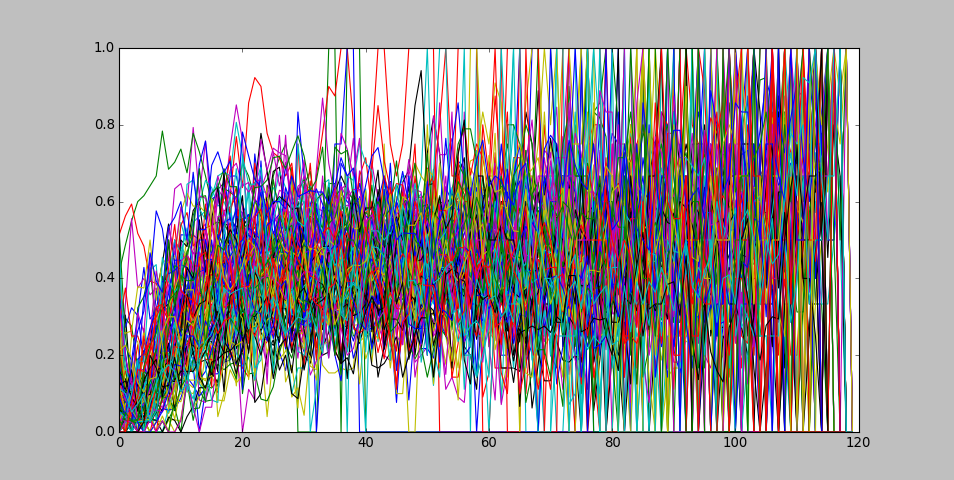

In [7]:
FO_corr.plot(legend=False)

<IPython.core.display.Javascript object>


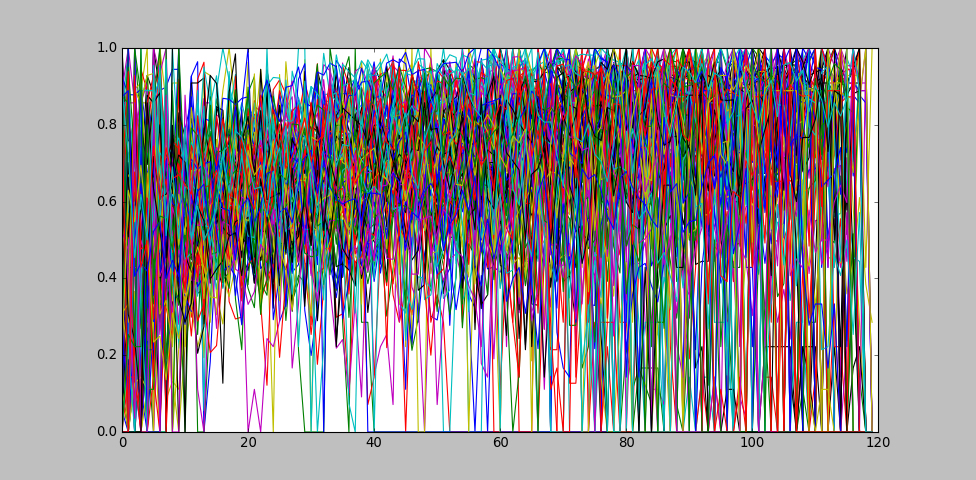

In [8]:
RM_corr.plot(legend=False)

Spostrzerzenia:
* Dość to losowe
* W FO jest jakiś trend rosnący w pierwszych sekundach, z RM jest losowo cały czas

# Możliwe wyjaśnienia
* Ludzie na poczatku losowo trafiają sobie w przypadkowo poprawne odpowiedzi, przy takim bezmyślnym przyglądaniu się scenie
* Ilość wartości z których liczymy średnią mocno maleje z czasem. 

Noniższe wykresy pokazują liczbę bodźców z których dokonano uśrednienia dla każdej sekudny w obu warunkach. (Max to 45, bo tyle było traili )

<IPython.core.display.Javascript object>


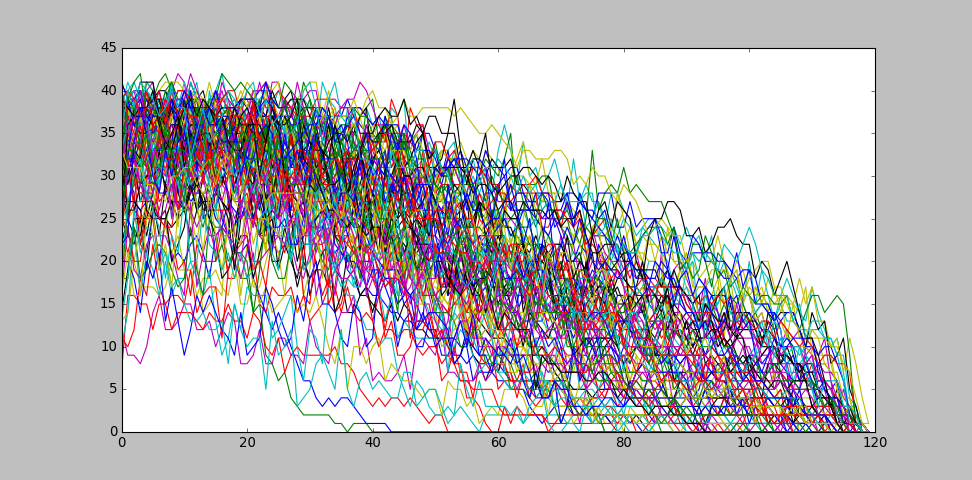

In [9]:
FOx.applymap(lambda x: len(x)).plot(legend=False)

<IPython.core.display.Javascript object>


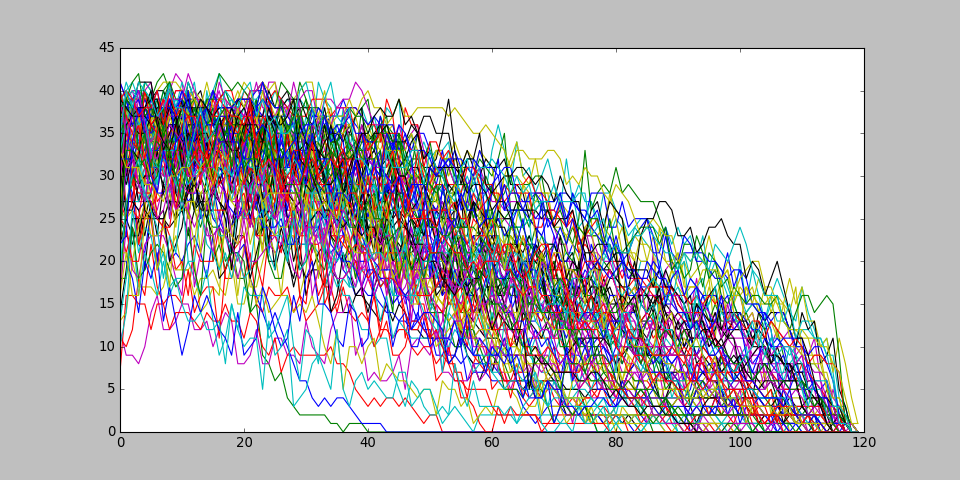

In [10]:
RMx.applymap(lambda x: len(x)).plot(legend=False)

Takie średnio systematyczne wyniki kiepsko dla nas pracują (i chyba średnio mają sens) zwracałeś zresztą uwagę na taki problem już na samym początku 

# Możliwe rozwiązanie
Przyszło mi do głowy sprawdzenie innej korekty, która wydaje mi się bardziej sensowna. 
Polegała by ona na zsumowaniu wartości dla każdej z sekund i podzieleniu jej przez 45 (liczbę triali).
Jesteśmy wtedy bardziej odporni na takie przypadkowe fiksacje na dobrych odpowiedziach, wynikające z bładzenia wzrokiem a nie budowania reprezentacji rozwiązania.

Dla ułatwienia rozmowy, tę pierwotną korektę z uśrednianiem nazwijmy **KOREKTĄ KLASYCZNĄ** a tą nową **KOREKTĄ 45**

# Różnice w korektach, dla porównania 

## FO KLASYCZNA

<IPython.core.display.Javascript object>


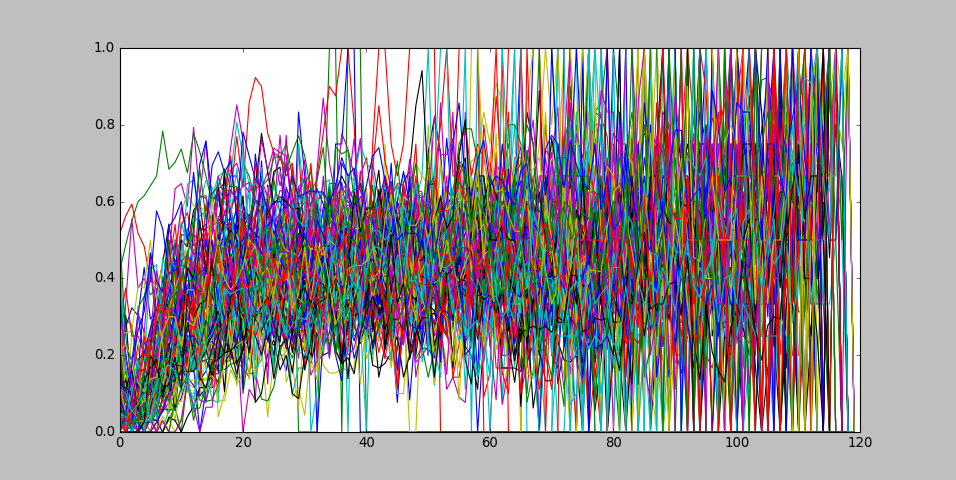

In [11]:
FOx.applymap(lambda x: np.mean(x) if x else 0).plot(legend=False)

# FO 45

<IPython.core.display.Javascript object>


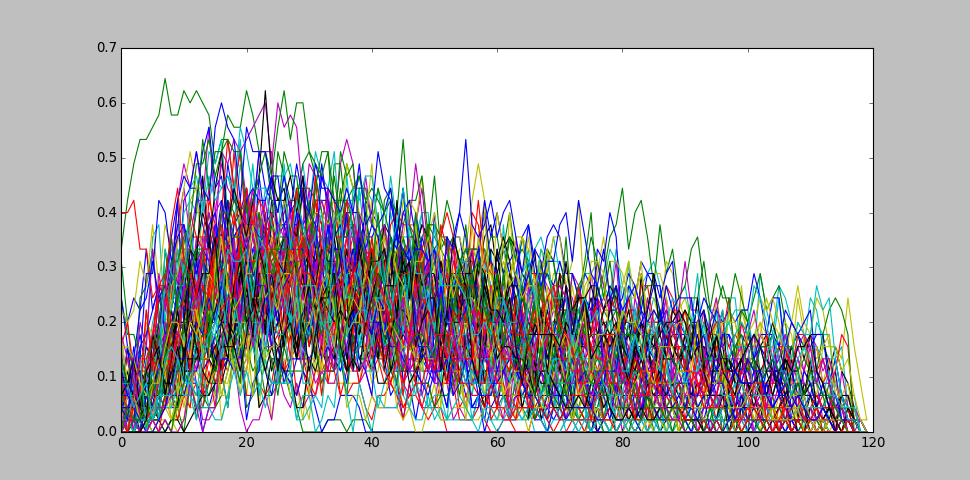

In [12]:
FOx.applymap(lambda x: np.sum(x)/45.0 if x else 0).plot(legend=False)

## RM Klasyczna

<IPython.core.display.Javascript object>


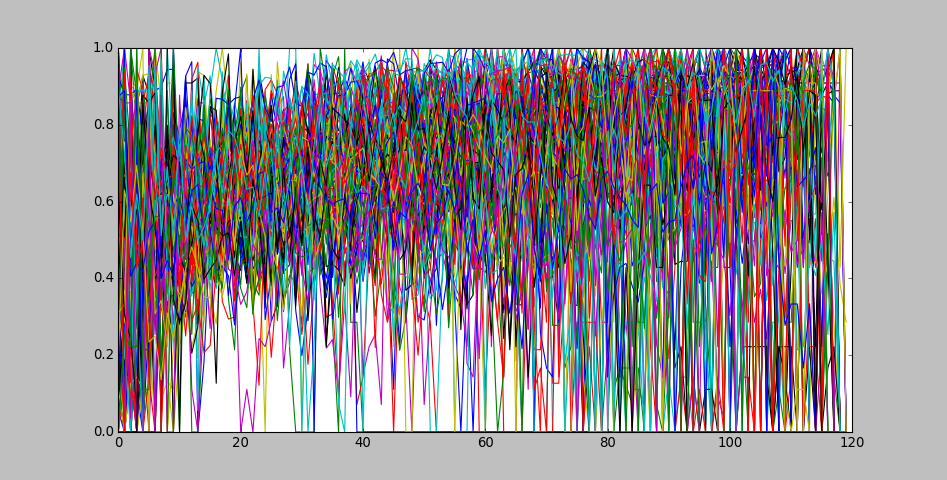

In [13]:
RMx.applymap(lambda x: list(filter(lambda a: a>=0, x))).applymap(lambda x: np.mean(x) if x else 0).plot(legend=False)

## RM 45

<IPython.core.display.Javascript object>


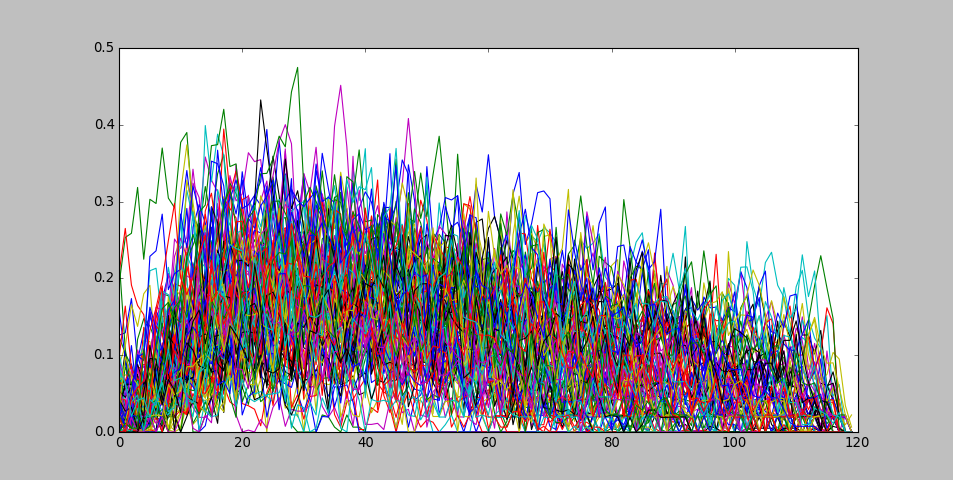

In [14]:
# RMx.applymap(lambda x: np.sum(x)/45.0 if x else 0).plot(legend=False)
RMx.applymap(lambda x: list(filter(lambda a: a>=0, x))).applymap(lambda x: np.sum(x)/45.0 if x else 0).plot(legend=False)

# Zapisywanie wyników, nieistotne. 

In [15]:
RM45 = RMx.applymap(lambda x: list(filter(lambda a: a>=0, x))).applymap(lambda x: np.sum(x)/45.0 if x else 0).to_dict(orient='list')
RMCLASSIC = RMx.applymap(lambda x: list(filter(lambda a: a>=0, x))).applymap(lambda x: np.mean(x) if x else 0).to_dict(orient='list')
FO45 = FOx.applymap(lambda x: np.sum(x)/45.0 if x else 0).to_dict(orient='list')
FOCLASSIC = FOx.applymap(lambda x: np.mean(x) if x else 0).to_dict(orient='list')

In [16]:
pickle.dump(RM45, open('RM45.pickle','wb'), pickle.HIGHEST_PROTOCOL)
pickle.dump(RMCLASSIC, open('RMCLASSIC.pickle','wb'), pickle.HIGHEST_PROTOCOL)
pickle.dump(FO45, open('FO45.pickle','wb'), pickle.HIGHEST_PROTOCOL)
pickle.dump(FOCLASSIC, open('FOCLASSIC.pickle','wb'), pickle.HIGHEST_PROTOCOL)
